---

**Name** : Asoke Rathnayake

**email**: asokerathnayake@gmail.com/ asoke.rathnayake@dialog.lk

**Proejct** : Travel Attraction Q & A Companion

**Application** :
Question and Answering appication specially for travlling (Attractions, Point of interests) related information which returns responce in Sinhala




---



**Use case** : The user can ask questions (Specially for Travelling, Point of interests and attractions) in English and the response will be returned in Sinhala.

**The reason to allow English input** :  most of the users can type some of the simple questions in English, but sometimes the response/answer will be a bit complex to understand.

**How this technically works**: user can ask any questions in English and the response will be sent to the English-to-Sinhala translation service lingvanex via API call and returns the Sinhala-translated answer to users with an English answer.

**The reason for using lingvanex translation service**: As per my experience OpenAI Sinhala translation isn’t meaningful enough to understand. But lingvanex Sinhala translation is more meaningful and clear. It’s almost similar to Google Sinhala translation as well. but lingvanex is much cheaper than comparing with Google.

**Future Improvement** : Allow users to input the question in Sinhala.


I've developped the application on Node Red, But there is an issue with rendering in Sinhala in Node red frontend.

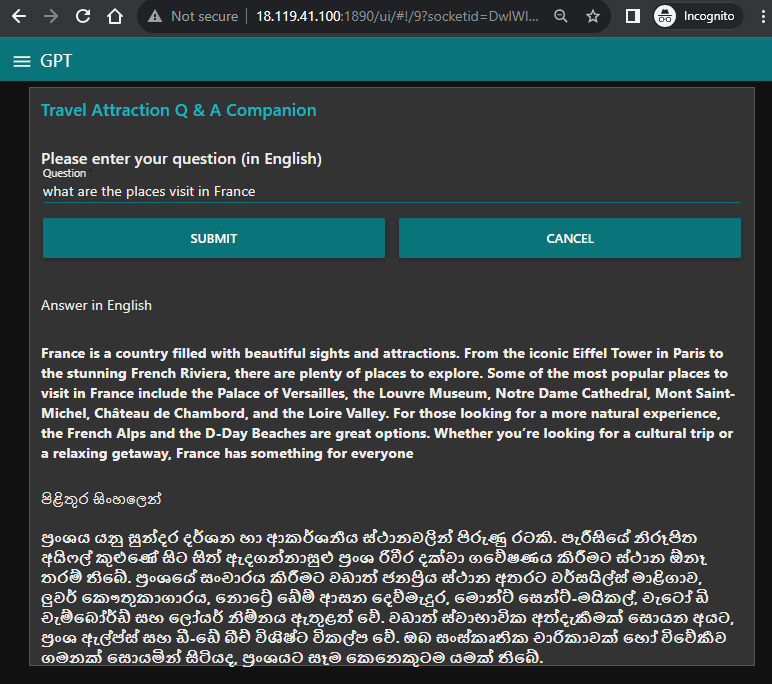

Code Block

In [ ]:
!pip install openai

Get the OpenAI and lingvanex API keys from config.ini



In [ ]:
#Get the API keys from Config file
import configparser
config = configparser.ConfigParser()
config.read(r'/content/sample_data/config.ini')
# You can get the Config https://raw.githubusercontent.com/asokerathnayake/CGPT/main/config.ini

#[OPENAI]
openai_api_key = config['OPENAI']['openai_api_key']
#[LINGVANEX]
lingvanex_api_key = config['LINGVANEX']['lingvanex_api_key']


Below Code having two fuctions

1.   OpenAPI for question and answering.
2.   Language traslation.



In [ ]:
import requests
import json
#--------------------------------------------------------------------------------------------------------------------------------------------
# OpenAI Q & A code.
def ask_question_and_get_answer(question):
    oapi_key = openai_api_key
    oapi_url = "https://api.openai.com/v1/completions"

    system_prompt = "You are an AI Traveling attractions Expert. Your goal is to provide clever descriptive answers about the travel-related details, points of interest around and attractions in that location.\n"
    user_prompt = f"User: {question}?"
    fullmessage = system_prompt + user_prompt

    oheaders = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {oapi_key}"
              }
    opayload = {
        "model": "text-davinci-003",
        "prompt": f"{fullmessage}",
        "temperature": 0.5,
        "max_tokens": 250,
        "top_p": 1,
        "frequency_penalty": 0,
        "presence_penalty": 0
        }
    try:
        oresponse = requests.post(oapi_url, headers=oheaders, data=json.dumps(opayload))
        oresponse_data = oresponse.json()
        oanswer = oresponse_data ['choices'][0]['text'].strip()
        return oanswer
    except requests.exceptions.RequestException as e:
        print(f"Error API request: {e}")
        return None
#--------------------------------------------------------------------------------------------------------------------------------------------
# ChatGPT traslation isnt good in sinhala traslation i use lingvanex traslation api, this is much cheaper than Google traslation as well
def translate_text(source_text):
    s_language = "en_GB"
    t_language = "si_LK"
    api_key = lingvanex_api_key
    url = "https://api-b2b.backenster.com/b1/api/v3/translate"
    payload = {
        "platform": "api",
        "from": s_language,
        "to": t_language,
        "data": source_text
    }
    headers = {
        "accept": "application/json",
        "content-type": "application/json",
        "Authorization": api_key
    }
    try:
        response = requests.post(url, json=payload, headers=headers)
        response_data = response.json()
        return response_data['result'].strip()
    except requests.exceptions.RequestException as e:
        print(f"Error with API request: {e}")
        return None
#--------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#--------------------------------------------------------------------------------------------------------------------------------------------
# Try the functions
# what are the places visit in London?
question = "what are the places visit in France"
answer = ask_question_and_get_answer(question)
print("Answer:", answer)
translation_result = translate_text(answer)
print("Sinhala Traslation:", translation_result)
#--------------------------------------------------------------------------------------------------------------------------------------------


Answer: France is a country filled with beautiful sights and attractions. From the iconic Eiffel Tower in Paris to the stunning French Riviera, there are plenty of places to explore. Some of the most popular places to visit in France include the Palace of Versailles, the Louvre Museum, Notre Dame Cathedral, Mont Saint-Michel, Château de Chambord, and the Loire Valley. For those looking for a more natural experience, the French Alps and the D-Day Beaches are great options. Whether you’re looking for a cultural trip or a relaxing getaway, France has something for everyone.
Sinhala Traslation: ප්‍රංශය යනු සුන්දර දර්ශන හා ආකර්ශනීය ස්ථානවලින් පිරුණු රටකි. පැරීසියේ නිරූපිත අයිෆල් කුළුණේ සිට සිත් ඇදගන්නාසුළු ප්‍රංශ රිවීර දක්වා ගවේෂණය කිරීමට ස්ථාන ඕනෑ තරම් තිබේ. ප්‍රංශයේ සංචාරය කිරීමට වඩාත් ජනප්‍රිය ස්ථාන අතරට වර්සයිල්ස් මාළිගාව, ලුවර් කෞතුකාගාරය, නොට්‍රේ ඩේම් ආසන දෙව්මැදුර, මොන්ට් සෙන්ට්-මයිකල්, චැටෝ ඩි චැම්බෝර්ඩ් සහ ලෝයර් නිම්නය ඇතුළත් වේ. වඩාත් ස්වාභාවික අත්දැකීමක් සොයන අයට, ප්‍රංශ ඇල්ප්ස් 